### Script for comparing different ocr-workflows
#### Goal: comparable value to evaluate the benefits of different text recognition approaches


**Step 1:** Read in data sets -gt.txt and -out.txt

**Step 2:** Fill dict according to lines

**Step 3:** Check output-lines for the similarity to groundtruth-lines (using SequenceMatcher)

**Step 4:** Perform for all text files within certain folder 

**Step 5:** Check the total percentage of similarity for each workflow

### Workflow: TIF
**Before:** Using the best language and font models from Tesseract on .tif files to generate text output

In [5]:
# import OS module to use operating system dependent functionalities
import os
os.path

<module 'ntpath' from 'C:\\Users\\merle\\AppData\\Local\\Programs\\Python\\Python310\\lib\\ntpath.py'>

In [6]:
# create list of all files in ./Stichprobe_TIFF
file_list = os.listdir("./Stichprobe_OCR4ALL")
# create separated list for -gt.txt and -out.txt files
file_list_gt=[]
file_list_out=[]
for file in file_list:
    if file.endswith("-gt.txt"):
        file_list_gt.append(file)
    if file.endswith("-out.txt"):
        file_list_out.append(file)

In [7]:
# check output files list
file_list_out

['KaUf_73_1_0002-out.txt',
 'KaUf_73_1_0003-out.txt',
 'KaUf_73_1_0004-out.txt',
 'KaUf_73_1_0005-out.txt',
 'KaUf_74_1_0019-out.txt',
 'KaUf_74_1_0020-out.txt',
 'KaUf_74_1_0021-out.txt',
 'KaUf_74_1_0022-out.txt',
 'KaUf_74_2_0004-out.txt',
 'KaUf_74_2_0005-out.txt',
 'KaUf_74_2_0006-out.txt',
 'KaUf_74_2_0007-out.txt',
 'KaUf_75_1_0004-out.txt',
 'KaUf_75_1_0006-out.txt',
 'KaUf_75_1_0008-out.txt',
 'KaUf_75_1_0010-out.txt',
 'KaUf_76_1_0004-out.txt',
 'KaUf_76_1_0005-out.txt',
 'KaUf_76_1_0006-out.txt',
 'KaUf_76_1_0008-out.txt',
 'KaUf_76_2_0052-out.txt',
 'KaUf_76_2_0053-out.txt',
 'KaUf_76_2_0054-out.txt',
 'KaUf_76_2_0055-out.txt',
 'KaUf_77_1_0002-out.txt',
 'KaUf_77_1_0003-out.txt',
 'KaUf_77_1_0004-out.txt',
 'KaUf_77_1_0005-out.txt',
 'KaUf_77_2_0004-out.txt',
 'KaUf_77_2_0006-out.txt',
 'KaUf_77_2_0007-out.txt',
 'KaUf_77_2_0008-out.txt',
 'KaUf_78_1_0004-out.txt',
 'KaUf_78_1_0005-out.txt',
 'KaUf_78_1_0006-out.txt',
 'KaUf_78_1_0007-out.txt',
 'KaUf_79_1_0003-out.txt',
 

In [8]:
# check ground truth files list
file_list_gt

['KaUf_73_1_0002-gt.txt',
 'KaUf_73_1_0003-gt.txt',
 'KaUf_73_1_0004-gt.txt',
 'KaUf_73_1_0005-gt.txt',
 'KaUf_74_1_0019-gt.txt',
 'KaUf_74_1_0020-gt.txt',
 'KaUf_74_1_0021-gt.txt',
 'KaUf_74_1_0022-gt.txt',
 'KaUf_74_2_0004-gt.txt',
 'KaUf_74_2_0005-gt.txt',
 'KaUf_74_2_0006-gt.txt',
 'KaUf_74_2_0007-gt.txt',
 'KaUf_75_1_0004-gt.txt',
 'KaUf_75_1_0006-gt.txt',
 'KaUf_75_1_0008-gt.txt',
 'KaUf_75_1_0010-gt.txt',
 'KaUf_76_1_0004-gt.txt',
 'KaUf_76_1_0005-gt.txt',
 'KaUf_76_1_0006-gt.txt',
 'KaUf_76_1_0008-gt.txt',
 'KaUf_76_2_0052-gt.txt',
 'KaUf_76_2_0053-gt.txt',
 'KaUf_76_2_0054-gt.txt',
 'KaUf_76_2_0055-gt.txt',
 'KaUf_77_1_0002-gt.txt',
 'KaUf_77_1_0003-gt.txt',
 'KaUf_77_1_0004-gt.txt',
 'KaUf_77_1_0005-gt.txt',
 'KaUf_77_2_0004-gt.txt',
 'KaUf_77_2_0006-gt.txt',
 'KaUf_77_2_0007-gt.txt',
 'KaUf_77_2_0008-gt.txt',
 'KaUf_78_1_0004-gt.txt',
 'KaUf_78_1_0005-gt.txt',
 'KaUf_78_1_0006-gt.txt',
 'KaUf_78_1_0007-gt.txt',
 'KaUf_79_1_0003-gt.txt',
 'KaUf_79_1_0004-gt.txt',
 'KaUf_79_1_

In [9]:
# prepare dict with filename as key and lines as values (ground truth)
file_dict_gt= {}
for file_name in file_list_gt:
    file_dict_gt[file_name] = []

# for each file in list oft gt.txt files
for file_name in file_list_gt:    
    # open file
    file = open(f'./Stichprobe_OCR4ALL/{file_name}',"r",encoding='utf-8')
    # for each line in opened file
    for line in file:
        # remove \n
        line = line.strip("\n")
        if len(line) != 0:
            # add line to value of dict key of that file
            file_dict_gt[file_name].append(line)
    file.close()

print(file_dict_gt)

{'KaUf_73_1_0002-gt.txt': ['HAUPTSACHE FERIEN', 'Musik: Heinz Kiessling', 'Regie: Peter Weck', 'Darsteller: Peter Alexander, Christiane', 'Hörbiger, Theo Lingen, Martin Held', 'u. v. a.', 'Art: LUSTSPIEL', '418-1 ca. 120 m - S 8 - Color - Tonfilm', '418-3 ca. 120 m - S 8 - S/W - Tonfilm', 'Lehrer und Schüler haben am letzten Schultag', 'nur einen Gedanken: Hauptsache Ferien! Für', 'Studienrat Dr. Peter Markus und seine Toch-', 'ter Gaby bedeuten sie Sommer, Sonne, Cam-', 'ping! Für Corinna, Gabys Klassenkameradin, ', 'allerdings bringt der letzte Schultag nur die', 'Gewißheit: Sitzengeblieben! Corinna sieht al-', 'lerdings noch eine Möglichkeit: ihr reicher', 'Papa muß mit Geld den Weg zum Abitur', 'pflastern. Er soll Dr. Markus bestechen. Dieser', 'aber lehnt die Versetzung ab. Darum greift ihr', 'Vater zu einem letzte Mittel.', 'Ufa-Exclusiv-Serie', 'Hauptsache Ferien', 'Best.-Nr. 418, 419, 420 compl.', '= ca. 360 Meter - 60 Min.', 'PETER DER GROSSE', 'Musik: Heinz Kiessling', 'Regie

In [10]:
# prepare dict with filename as key and lines as values (output)
file_dict_out= {}
for file_name in file_list_out:
    file_dict_out[file_name] = []

# for each file in list oft text.txt files
for file_name in file_list_out:    
    # open file
    file = open(f'./Stichprobe_OCR4ALL/{file_name}',"r",encoding='utf-8') # FILLOUT
    # for each line in file
    for line in file:
        # remove \n
        line = line.strip("\n")
        if len(line) != 0:
            # add line to value of dict key of that file
            file_dict_out[file_name].append(line)
    file.close()

print(file_dict_out)

FileNotFoundError: [Errno 2] No such file or directory: './Stichprobe_TIFF/KaUf_73_1_0002-out.txt'

In [11]:
# create result dict
result_dict = {}
for file_name in file_list_gt:
    result_dict[file_name.replace("-gt.txt", "")] = []
# check finished dict
result_dict

{'KaUf_73_1_0002': [],
 'KaUf_73_1_0003': [],
 'KaUf_73_1_0004': [],
 'KaUf_73_1_0005': [],
 'KaUf_74_1_0019': [],
 'KaUf_74_1_0020': [],
 'KaUf_74_1_0021': [],
 'KaUf_74_1_0022': [],
 'KaUf_74_2_0004': [],
 'KaUf_74_2_0005': [],
 'KaUf_74_2_0006': [],
 'KaUf_74_2_0007': [],
 'KaUf_75_1_0004': [],
 'KaUf_75_1_0006': [],
 'KaUf_75_1_0008': [],
 'KaUf_75_1_0010': [],
 'KaUf_76_1_0004': [],
 'KaUf_76_1_0005': [],
 'KaUf_76_1_0006': [],
 'KaUf_76_1_0008': [],
 'KaUf_76_2_0052': [],
 'KaUf_76_2_0053': [],
 'KaUf_76_2_0054': [],
 'KaUf_76_2_0055': [],
 'KaUf_77_1_0002': [],
 'KaUf_77_1_0003': [],
 'KaUf_77_1_0004': [],
 'KaUf_77_1_0005': [],
 'KaUf_77_2_0004': [],
 'KaUf_77_2_0006': [],
 'KaUf_77_2_0007': [],
 'KaUf_77_2_0008': [],
 'KaUf_78_1_0004': [],
 'KaUf_78_1_0005': [],
 'KaUf_78_1_0006': [],
 'KaUf_78_1_0007': [],
 'KaUf_79_1_0003': [],
 'KaUf_79_1_0004': [],
 'KaUf_79_1_0005': [],
 'KaUf_79_1_0006': [],
 'KaUf_79_2_0023': [],
 'KaUf_79_2_0024': [],
 'KaUf_79_2_0025': [],
 'KaUf_79_2

In [12]:
# SequenceMatcher: compare similarity of two strings by their ratio
from difflib import SequenceMatcher as SM

# iterate over keys in out.txt dict
for key in file_dict_gt:
    gt_value = file_dict_gt[key]
    # get beginning of file name and use it to extract value of out.txt dict
    out_value = file_dict_out[key.replace("-gt", "-out")]
    # for each pair of value compute distance measure 
    for string_gt in gt_value:
        print("*********************************************************")
        print("This is gt value:")
        print(string_gt)     
        best_ratio = 0
        for string_out in out_value:
            print("--------------------------------")
            print("Try fitting with this out value:")
            print(string_out)
            similarity_ratio = SM(None, string_gt, string_out).ratio()
            print(f'The score is: {similarity_ratio}')
            if similarity_ratio >= best_ratio:
                best_ratio = similarity_ratio
                best_string_out = string_out
        result_dict[key.replace("-gt.txt", "")].append({
            'groundtruth_line':string_gt,
            'output_line': best_string_out,
            'similarity_ratio': best_ratio })
        #if best_string_out in out_value:
            #out_value.remove(best_string_out)

KeyError: 'KaUf_73_1_0002.tif-sat0.tif-out.txt'

In [9]:
result_dict

{'KaUf_73_1_0002': [{'groundtruth_line': 'HAUPTSACHE FERIEN',
   'output_line': 'HAUPTSACHE FERIEN',
   'similarity_ratio': 1.0},
  {'groundtruth_line': 'Musik: Heinz Kiessling',
   'output_line': 'Musik: Heinz Kiessling',
   'similarity_ratio': 1.0},
  {'groundtruth_line': 'Regie: Peter Weck',
   'output_line': 'Regie: Peter Weck',
   'similarity_ratio': 1.0},
  {'groundtruth_line': 'Darsteller: Peter Alexander, Christiane',
   'output_line': 'Darsteller: Peter Alexander, Christiane',
   'similarity_ratio': 1.0},
  {'groundtruth_line': 'Hörbiger, Theo Lingen, Martin Held',
   'output_line': 'Hörbiger, Theo Lingen, Martin Held',
   'similarity_ratio': 1.0},
  {'groundtruth_line': 'u. v. a.',
   'output_line': 'uU. V. a..',
   'similarity_ratio': 0.7777777777777778},
  {'groundtruth_line': 'Art: LUSTSPIEL',
   'output_line': 'Art: LUSTSPIEL',
   'similarity_ratio': 1.0},
  {'groundtruth_line': '418-1 ca. 120 m - S 8 - Color - Tonfilm',
   'output_line': 'ca. 120 m - S 8 - Color - Tonfil

In [11]:
average_page_dict= {}
for file_name in file_list_gt:
    average_page_dict[file_name.replace("-gt.txt", "")] = None

sum = 0
counter_lines = 0
counter_files = 0
total_sum = 0

for key in average_page_dict:
    # entry is the list value of each page key
    for entry in result_dict[key]:
        #print(entry['similarity_ratio'])
        sum = sum + entry['similarity_ratio']
        counter_lines = counter_lines+1
    counter_files = counter_files+1
    average_page_dict[key] = sum/counter_lines
    total_sum = total_sum+average_page_dict[key]

In [21]:
total_sum/counter_files*100

91

In [13]:
sortedDict = sorted(average_page_dict.values())
sortedDict

[0.8852843835465093,
 0.8890999913175991,
 0.8965732828793435,
 0.8973956815817147,
 0.8978079291918852,
 0.8985412620647666,
 0.8992827196825374,
 0.901461814146357,
 0.9014880198361208,
 0.9016420270607682,
 0.902518045942424,
 0.9035209176959292,
 0.90461524242388,
 0.9049104039716503,
 0.9056086812664736,
 0.9056415022790049,
 0.9057100034952912,
 0.90577962208025,
 0.9060586273179081,
 0.9062412502513084,
 0.9067292001818713,
 0.9072863840371523,
 0.907732575444198,
 0.9077550679723848,
 0.9077840908512371,
 0.9090211392632944,
 0.9095205991760631,
 0.9098902516639278,
 0.910626454023533,
 0.9110624343473704,
 0.9113220364755376,
 0.9117313493804292,
 0.9119478811118729,
 0.9123679476298683,
 0.913101039516517,
 0.913489620713753,
 0.9140705540788837,
 0.9145260122525677,
 0.9149581367561394,
 0.9153578970741185,
 0.9155081921196547,
 0.9157959158934031,
 0.9158798149123101,
 0.9167592703906976,
 0.9171206791641181,
 0.9196617949316299,
 0.9204143355216765,
 0.9205279229492627,
 0

In [14]:
average_page_dict

{'KaUf_73_1_0002': 0.9014880198361208,
 'KaUf_73_1_0003': 0.9333515465842357,
 'KaUf_73_1_0004': 0.9098902516639278,
 'KaUf_73_1_0005': 0.8985412620647666,
 'KaUf_74_1_0019': 0.8890999913175991,
 'KaUf_74_1_0020': 0.8852843835465093,
 'KaUf_74_1_0021': 0.8965732828793435,
 'KaUf_74_1_0022': 0.907732575444198,
 'KaUf_74_2_0004': 0.9157959158934031,
 'KaUf_74_2_0005': 0.9205279229492627,
 'KaUf_74_2_0006': 0.927280024910217,
 'KaUf_74_2_0007': 0.9204143355216765,
 'KaUf_75_1_0004': 0.9167592703906976,
 'KaUf_75_1_0006': 0.9158798149123101,
 'KaUf_75_1_0008': 0.9140705540788837,
 'KaUf_75_1_0010': 0.913101039516517,
 'KaUf_76_1_0004': 0.910626454023533,
 'KaUf_76_1_0005': 0.9113220364755376,
 'KaUf_76_1_0006': 0.9110624343473704,
 'KaUf_76_1_0008': 0.9062412502513084,
 'KaUf_76_2_0052': 0.9016420270607682,
 'KaUf_76_2_0053': 0.9057100034952912,
 'KaUf_76_2_0054': 0.9056086812664736,
 'KaUf_76_2_0055': 0.9077840908512371,
 'KaUf_77_1_0002': 0.9067292001818713,
 'KaUf_77_1_0003': 0.90491040

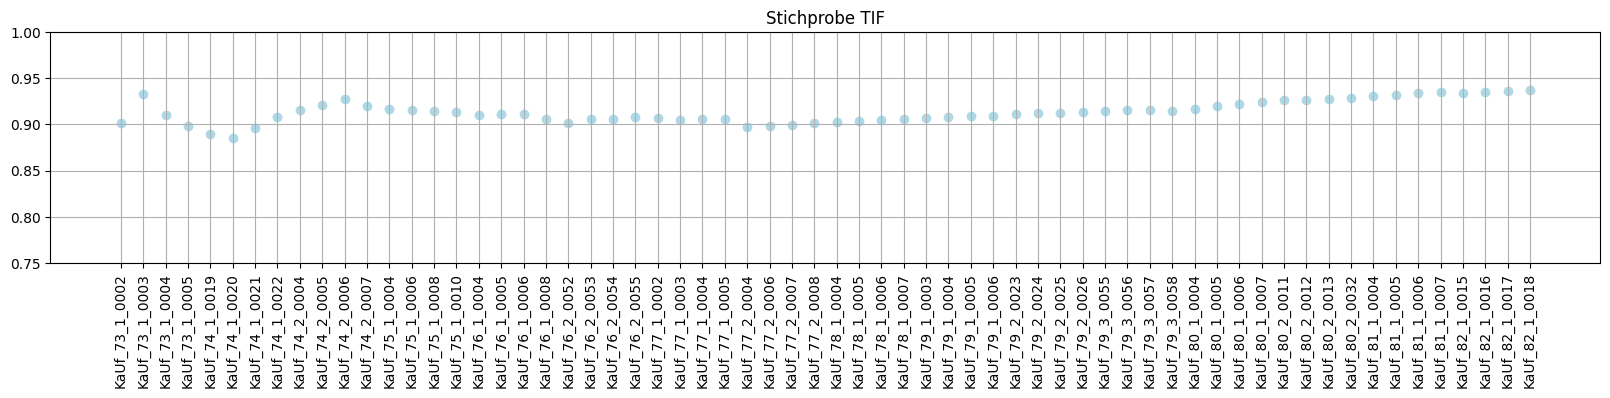

In [24]:
import matplotlib.pylab as plt

myList = average_page_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(3)
plt.title("Stichprobe OCR4ALL")
plt.scatter(x, y, color='lightblue')
plt.ylim(0.75, 1)

plt.xticks(rotation=90)
plt.grid(True)
plt.show()